#### **Plant Disease Prediction Using Deep Learning Convolutional Neural Networks (CNN) and Keras**

#### **Purpose:** This project looks to develop a deep learning model built with TensorFlow and Keras for classifying plant diseases from images using Convolutional Neural Networks (CNN).

##### **Source:** New Plant Diseases dataset from Kaggle.

##### **Author:** Bello Oluwatobi

##### **Date:** December 25, 2025

### #1 Importing Libraries

In [1]:
# importing the required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from dotenv import load_dotenv

2025-12-26 19:27:56.419056: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-26 19:27:56.434008: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-26 19:27:58.562958: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-26 19:28:02.845049: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

In [3]:
# automatically detecting the presence of GPU on your physical/virtual machine
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print(f"GPU detected: {len(physical_devices)} device(s) available.")
else:
    print("No GPU found. Running on CPU.")


No GPU found. Running on CPU.


2025-12-26 10:49:21.855904: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### #2 Downloading and unzipping the dataset

In [ ]:
# new plant diseases dataset url
_URL = 'https://drive.usercontent.google.com/download?id=1d8q3147YuLAms4hPzANMRw9sCUSMwBiw&export=download&authuser=0&confirm=t'

# loading the variables.env file
load_dotenv(dotenv_path='../variables.env')

# retrieving the folder path variable from the variables.env file
dir_path = os.getenv('FOLDER_PATH')

# saving the file directly to the specified absolute path
path_to_zip = tf.keras.utils.get_file(
    fname='new-plant-diseases-dataset.zip', 
    origin=_URL,
    extract=True,
    cache_dir=dir_path,
    cache_subdir='unzipped_dataset'
)


### #3 Data Preprocessing

##### Training Image Preprocessing

In [8]:
# loading training data with categorical labels and 128x128 image resizing
training_set = tf.keras.utils.image_dataset_from_directory(
    "../unzipped_dataset/new-plant-diseases-dataset_extracted/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    # format="tf",
    verbose=True,
)

Found 70295 files belonging to 38 classes.


2025-12-26 19:40:47.768765: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


##### Validation Image Preprocessing

In [ ]:
# loading validation data with categorical labels and 128x128 image resizing
validation_set = tf.keras.utils.image_dataset_from_directory(
    "../unzipped_dataset/new-plant-diseases-dataset_extracted/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    # data_format=None,
    # format="tf",
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
# confirming properties of the training set
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

### #4 Building Model

In [ ]:
# importing components for building a Sequential CNN architecture
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [ ]:
# initializing the model instance
model = Sequential()

##### Building Convolution Layer

In [ ]:
# First Convolutional block: Extracting low-level features (edges/textures) and downsampling the spatial resolution
model.add(Conv2D(filters=32,kernel_size=3, padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Second Convolution block: 
# extracting complex patterns by doubling filter depth and further downsampling
model.add(Conv2D(filters=64,kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
# Third Convolution block: 
# increasing the filter depth to 128 to capture high-level, abstract leaf disease features
model.add(Conv2D(filters=128,kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
# Fourth Convolution block: 
# capturing ultra-fine details with 256 filters
model.add(Conv2D(filters=256,kernel_size=3, padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
# Fifth Convolution block: 
# maximum feature extraction with 512 filters for identifying complex disease patterns
model.add(Conv2D(filters=512,kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [ ]:
# deactivating 25% of neurons to prevent model overfitting
model.add(Dropout(0.25))

In [ ]:
# flattening the 3D feature maps into a 1D vector for the final classification layers
model.add(Flatten())

In [ ]:
# aggregates all extracted features for the final prediction
model.add(Dense(units=1500, activation='relu'))

In [ ]:
# deactivating 40% of neurons to prevent model overfitting
model.add(Dropout(0.4))

In [ ]:
# Output layer: 
# specifying 38 units (one per plant disease class) with softmax for probability distribution
model.add(Dense(units=38, activation='softmax'))

### #5 Compiling Model

In [ ]:
# preparing model for training with categorical labels and performance tracking
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# generating the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### #6 Model Training

In [ ]:
# starting the training for 10 epochs and monitoring the validation accuracy
training_history = model.fit(training_set, epochs=10, validation_data=validation_set)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 172s 72ms/step - accuracy: 0.3792 - loss: 2.2234 - val_accuracy: 0.8217 - val_loss: 0.5767
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.8399 - loss: 0.5150 - val_accuracy: 0.9045 - val_loss: 0.2962
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9074 - loss: 0.2816 - val_accuracy: 0.9356 - val_loss: 0.1970
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9376 - loss: 0.1915 - val_accuracy: 0.9416 - val_loss: 0.1788
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 0.9543 - loss: 0.1408 - val_accuracy: 0.9495 - val_loss: 0.1609
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9630 - loss: 0.1108 - val_accuracy: 0.9484 - val_loss: 0.1677
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9706 - loss: 0.0906 - val_accuracy: 0.9598 - val_loss: 0.1260
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 137s 62ms/step - accuracy: 

### #7 Model Evaluation

In [ ]:
# model evaluation on training set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 55s 25ms/step - accuracy: 0.9907 - loss: 0.0287


In [ ]:
# displaying training data evaluation results
print(f"Training Accuracy: {train_acc}")
print(f"Training Loss: {train_loss}")

Training Accuracy: 0.9912796020507812
Training Loss: 0.0271867997944355


In [ ]:
# model evaluation on validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9668 - loss: 0.1164


In [ ]:
# displaying validation data evaluation results
print(f"Validation Accuracy: {val_acc}")
print(f"Validation Loss: {val_loss}")

Validation Accuracy: 0.9666514992713928
Validation Loss: 0.11569356173276901


### #8 Saving Model

In [ ]:
# exporting the trained model to storage in the in the native Keras format
model.save("../trained_model/plant_disease_trained_model.keras")

In [ ]:
# retrieving the recorded loss and accuracy values from the training session
training_history.history

In [ ]:
# storing the training history in json
import json

with open("../training_history/plant_disease_training_history.json", "w") as f:
    json.dump(training_history.history, f)

### #9 Accuracy and Loss Visualization

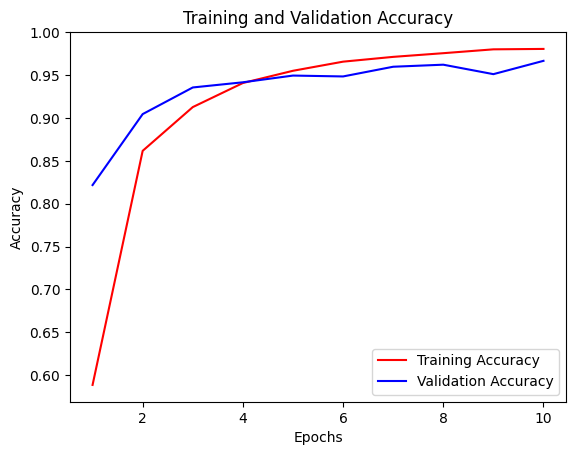

In [ ]:
# visualizing the model's accuracy across training and validation sets
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

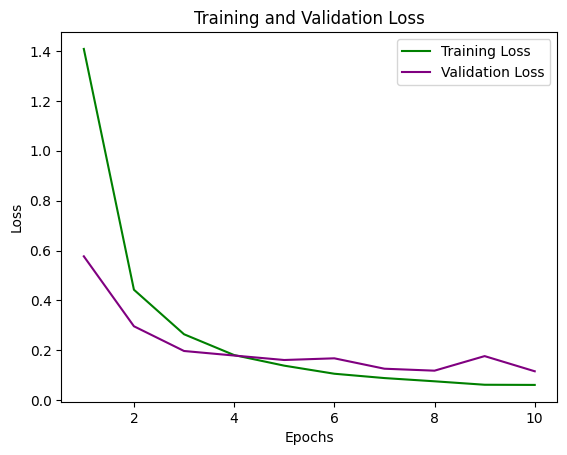

In [11]:
import json

# Open and load the file
with open('../training_history/plant_disease_training_history.json', 'r') as file:
    training_history = json.load(file)


# visualizing the model's loss across training and validation sets
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history['loss'], color='green', label='Training Loss')
plt.plot(epochs, training_history['val_loss'], color='purple', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### #10 Other Model Evaluation Metrics

In [ ]:
# extracting the 38 classes of plant disease
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [10]:
# utilizing the validation dataset as test dataset for further model evaluation
test_valid_set = tf.keras.utils.image_dataset_from_directory(
    "../unzipped_dataset/new-plant-diseases-dataset_extracted/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    # data_format=None,
    # format="tf",
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [ ]:
# performing prediction on the trained model using the test dataset
y_pred = model.predict(test_valid_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step


(array([[9.9998903e-01, 7.7888011e-08, 4.6578252e-10, ..., 7.0629223e-12,
         3.4865624e-13, 1.3690619e-11],
        [9.9852425e-01, 1.1075446e-04, 6.6651957e-08, ..., 8.0937932e-09,
         1.5184708e-10, 1.6111603e-08],
        [9.9999917e-01, 1.2104051e-08, 3.4551112e-10, ..., 7.0941063e-14,
         1.9436833e-14, 1.4579747e-10],
        ...,
        [8.3023732e-10, 1.2330053e-13, 8.4756840e-11, ..., 4.2509767e-12,
         7.4225397e-13, 9.9999988e-01],
        [1.7071499e-09, 4.7796602e-14, 6.9271575e-11, ..., 1.5714333e-11,
         5.2561856e-13, 9.9999976e-01],
        [3.4084161e-19, 2.0921312e-20, 1.2662098e-20, ..., 3.0712447e-20,
         9.2903450e-18, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [ ]:
# selecting the disease category with the highest confidence score for each image
predicted_categories = tf.argmax(y_pred, axis=1) # get the max of each column across each row

predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
# aggregating the ground-truth labels from the test dataset for comparison
true_categories = tf.concat([y for x, y in test_valid_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [ ]:
# selecting the disease category with the highest confidence score for each image
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

### #11 Precision, Recall and F1 scores on Test values

In [ ]:
# loading metrics to calculate F1-score and category-specific accuracy
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# displaying a table of precision, recall, and F1-score for each plant disease class
print(classification_report(Y_true, predicted_categories, target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.97      0.95       504
                                 Apple___Black_rot       0.97      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.99      0.96      0.97       440
                                   Apple___healthy       0.98      0.97      0.97       502
                               Blueberry___healthy       0.98      0.97      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.95      1.00      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.84      0.98      0.90       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.88      0.

### #12 Confusion Matrix

In [ ]:
# creating a 38x38 cross-tabulation of observed vs. predicted plant diseases
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[487,   5,   0, ...,   0,   0,   0],
       [  0, 489,   0, ...,   0,   0,   0],
       [  3,   0, 421, ...,   1,   0,   1],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   0, 477]])

##### Confusion Matrix Visualization

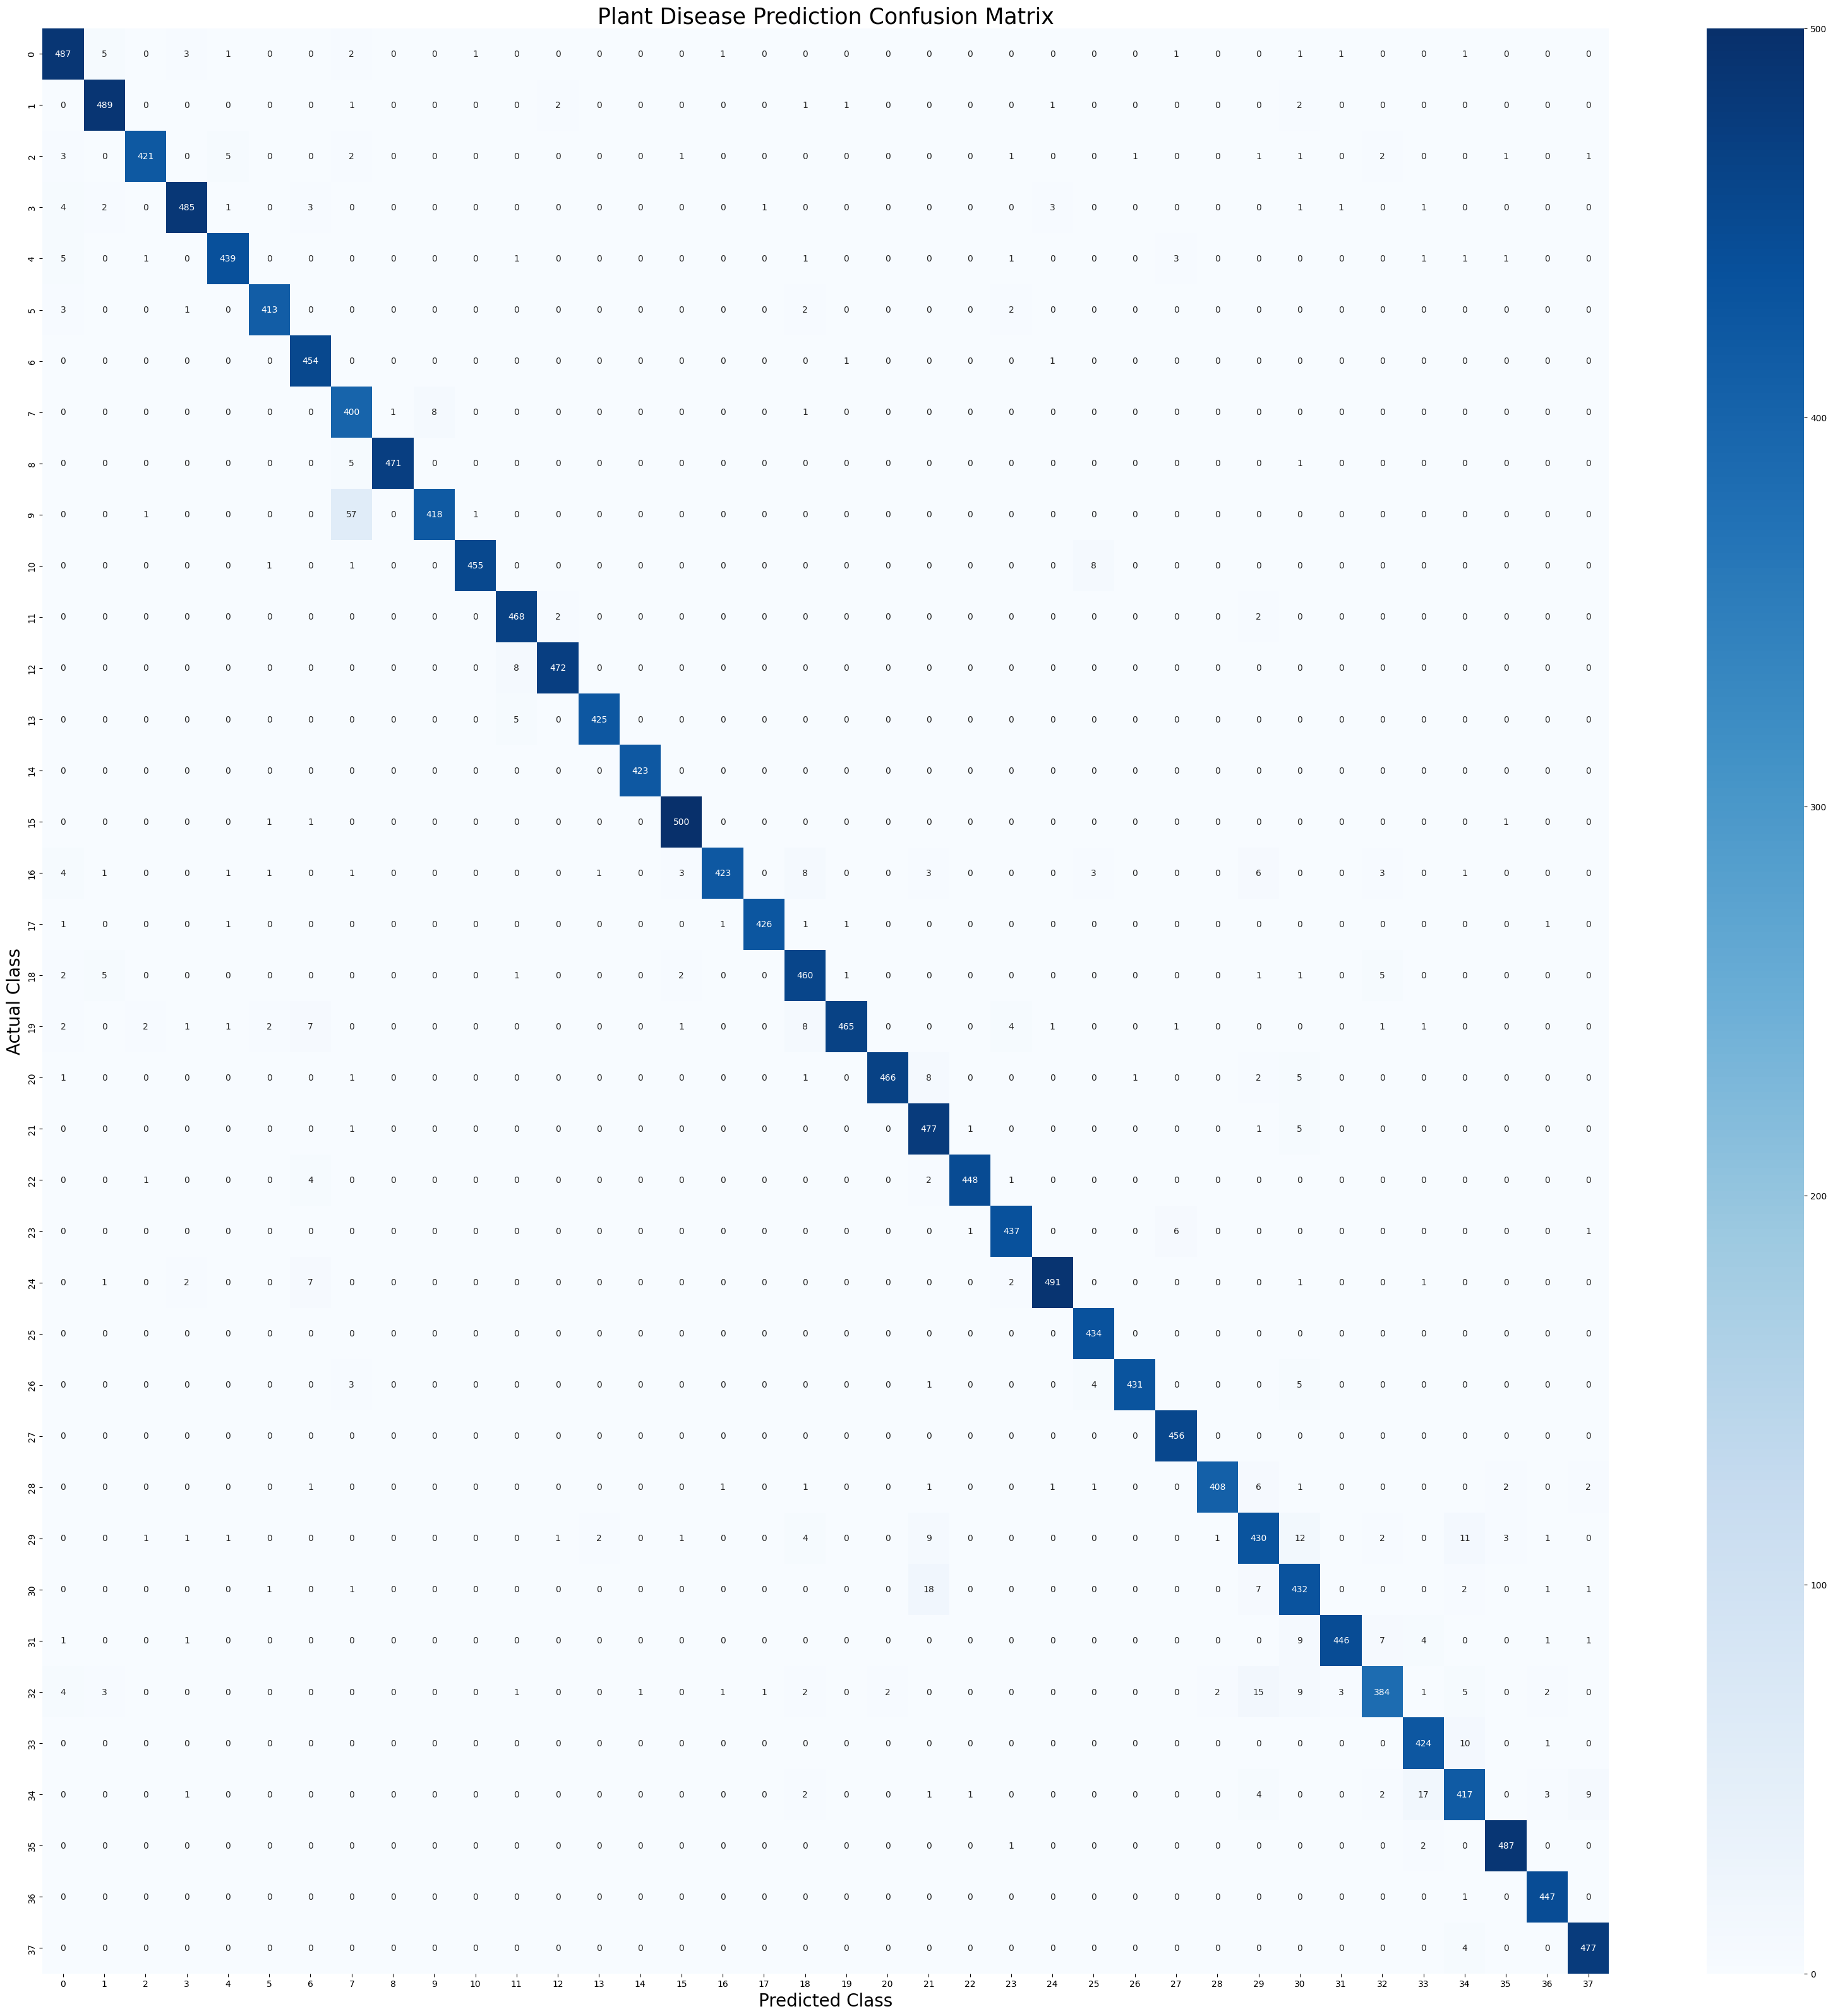

In [ ]:
# visualizing the final confusion matrix to compare predicted labels against observed
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 10})
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()